In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

champs=pd.read_csv('./league-of-legends-ranked-matches/champs.csv',encoding='utf-8')
matches=pd.read_csv('./league-of-legends-ranked-matches/matches.csv',encoding='utf-8')
participants=pd.read_csv('./league-of-legends-ranked-matches/participants.csv',encoding='utf-8')
stats1=pd.read_csv('./league-of-legends-ranked-matches/stats1.csv',encoding='utf-8')
stats2=pd.read_csv('./league-of-legends-ranked-matches/stats2.csv',encoding='utf-8')
stats_all = stats1.append(stats2)

df = pd.merge(participants,stats_all, how = 'left', on = ['id'], suffixes=('', '_stats'))

df = pd.merge(df , champs, how = 'left', left_on= 'championid', right_on='id'
             ,suffixes=('', '_champs') )
#print(df.head(10))
df = pd.merge(df, matches, how = 'left', left_on = 'matchid', right_on = 'id'
              , suffixes=('', '_matches'))

#print(df.columns)

def final_position(col):
    if col['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return col['role']
    else:
        return col['position']

df['adjposition'] = df.apply(final_position, axis = 1)
#print(df.head(5))

df['team'] = df['player'].apply(lambda x: '1' if x <= 5 else '2')
df['team_role'] = df['team'] + ' - ' + df['adjposition']
#print('BOT' in df['adjposition'])

remove_index = []
for i in ('1 - MID', '1 - TOP', '1 - DUO_SUPPORT', '1 - DUO_CARRY', '1 - JUNGLE',
          '2 - MID', '2 - TOP', '2 - DUO_SUPPORT', '2 - DUO_CARRY', '2 - JUNGLE'):
    df_remove = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role'] != 1].index.values)
# remove unclassified BOT, correct ones should be DUO_SUPPORT OR DUO_CARRY
remove_index.extend(df[df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))

#print('# matches in dataset before cleaning:{}'.format(df['matchid'].nunique()))
df = df[~df['matchid'].isin(remove_index)]
#print('# matches in dataset after cleaning: {}'.format(df['matchid'].nunique()))
#print('row_num',df.shape[0])#row_num 1486362
#zf = zipfile.ZipFile('cleansing_data' + '.zip', mode='w', allowZip64 = True)
# matches in dataset before cleaning:184069
# matches in dataset after cleaning: 148638

#Delete missing values
#print(df.isnull().any())
df_null=df[df.isnull().values==True]
#print(df_null.shape[0])
#print(df_null.head(20))
matchids=list(df_null['matchid'].drop_duplicates())
#print('matchids:\n',matchids)
#print('df_null_2\n',df[df.matchid.isin(matchids)])
df = df[~df.matchid.isin(matchids)]
#print(df[0:10])
#print(df.columns)


/Users/lyrehee/anaconda2/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,gameid,platformid,queueid,seasonid,duration,creation,version,adjposition,team,team_role
0,9,10,1,19,4,11,NONE,JUNGLE,0.0,3748.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,JUNGLE,1,1 - JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0,2301.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_SUPPORT,1,1 - DUO_SUPPORT
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.0,1055.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_CARRY,1,1 - DUO_CARRY
3,12,10,4,114,12,4,SOLO,TOP,0.0,1029.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,TOP,1,1 - TOP
4,13,10,5,112,4,3,SOLO,MID,0.0,3020.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,MID,1,1 - MID


In [6]:
df1 = df[['id', 'matchid', 'player', 'name', 'adjposition', 'team_role', 'win', 'kills', 'deaths', 'assists', 'dmgtoturrets','visionscore','totdmgtochamp', 'totheal', 'goldspent','totdmgtaken','pinksbought', 'wardsplaced', 'duration', 'platformid', 'seasonid', 'version']]
df1.head(10)

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,totdmgtochamp,totheal,goldspent,totdmgtaken,pinksbought,wardsplaced,duration,platformid,seasonid,version
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,9101.0,15160.0,10275.0,41446.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,8478.0,11707.0,7975.0,17769.0,1.0,17.0,1909,EUW1,8,7.10.187.9675
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,14425.0,2283.0,11775.0,25627.0,1.0,13.0,1909,EUW1,8,7.10.187.9675
3,12,10,4,Fiora,TOP,1 - TOP,0.0,5.0,11.0,2.0,...,15267.0,4252.0,10683.0,31705.0,0.0,3.0,1909,EUW1,8,7.10.187.9675
4,13,10,5,Viktor,MID,1 - MID,0.0,2.0,8.0,2.0,...,18229.0,1525.0,10485.0,20585.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
5,14,10,6,Skarner,JUNGLE,2 - JUNGLE,1.0,3.0,3.0,9.0,...,10587.0,10333.0,11758.0,22708.0,0.0,8.0,1909,EUW1,8,7.10.187.9675
6,15,10,7,Galio,TOP,2 - TOP,1.0,4.0,5.0,11.0,...,15050.0,1401.0,11575.0,21719.0,1.0,7.0,1909,EUW1,8,7.10.187.9675
7,16,10,8,Ahri,MID,2 - MID,1.0,13.0,4.0,8.0,...,28090.0,4840.0,13750.0,19174.0,0.0,8.0,1909,EUW1,8,7.10.187.9675
8,17,10,9,Jinx,DUO_CARRY,2 - DUO_CARRY,1.0,15.0,3.0,9.0,...,30749.0,2802.0,14375.0,17655.0,1.0,6.0,1909,EUW1,8,7.10.187.9675
9,18,10,10,VelKoz,DUO_SUPPORT,2 - DUO_SUPPORT,1.0,4.0,5.0,19.0,...,20021.0,3242.0,11675.0,13443.0,5.0,25.0,1909,EUW1,8,7.10.187.9675


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# The relationship between vision score and victory 

Text(0.5, 1.0, 'Wardsplaced by season: win vs loss')

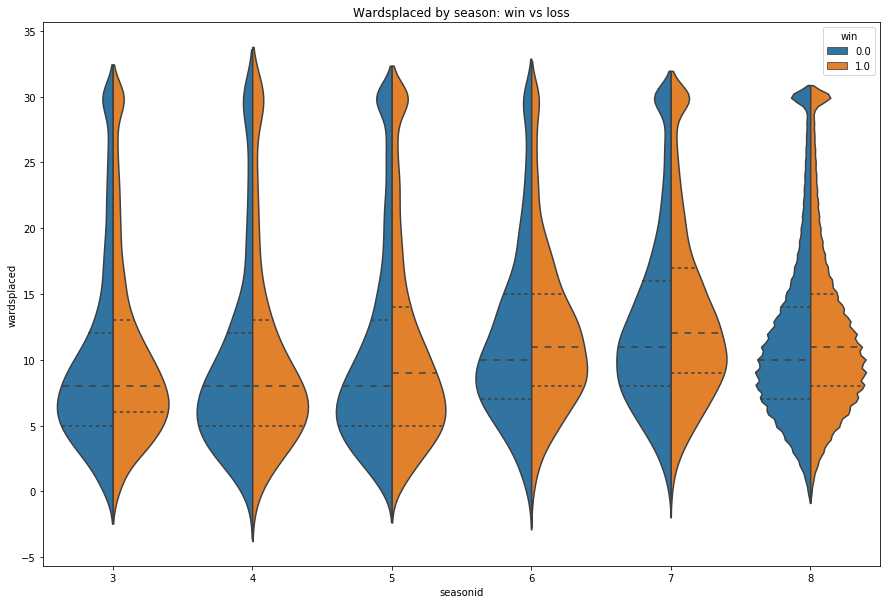

In [8]:
df_v = df1.copy()
# put upper and lower limit
df_v['wardsplaced'] = df_v['wardsplaced'].apply(lambda x: x if x<30 else 30)
df_v['wardsplaced'] = df_v['wardsplaced'].apply(lambda x: x if x>0 else 0)

plt.figure(figsize = (15,10))
sns.violinplot(x="seasonid", y="wardsplaced", hue="win", data=df_v, split=True, inner = 'quartile')
plt.title('Wardsplaced by season: win vs loss')

# The relationship between kills and victory 

Text(0.5, 1.0, 'Kills by season: win vs loss')

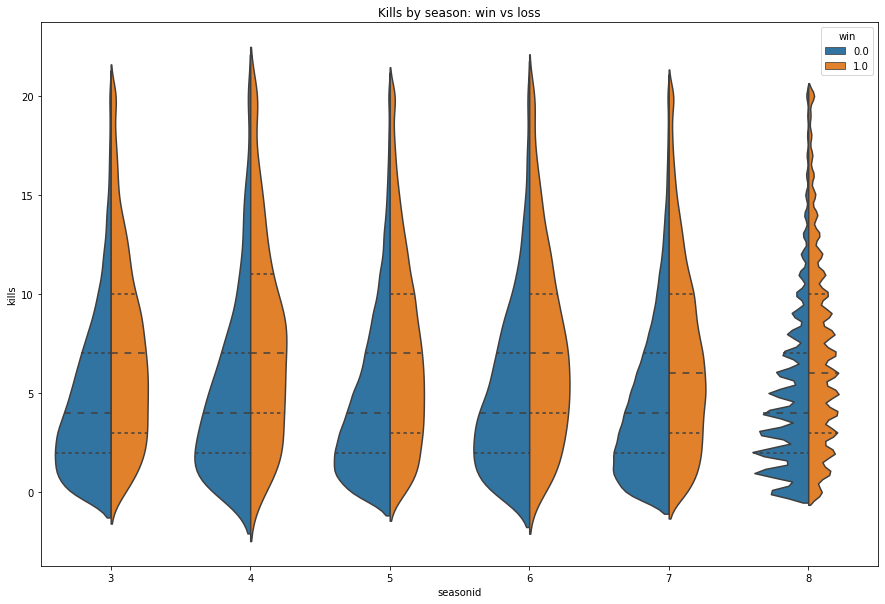

In [9]:
plt.figure(figsize = (15,10))

# put upper and lower limit
df_v['kills'] = df_v['kills'].apply(lambda x: x if x<20 else 20)
df_v['kills'] = df_v['kills'].apply(lambda x: x if x>0 else 0)

sns.violinplot(x="seasonid", y="kills", hue="win", data=df_v, split=True, inner = 'quartile')
plt.title('Kills by season: win vs loss')

# Relationship between artificially extracted features and win rate

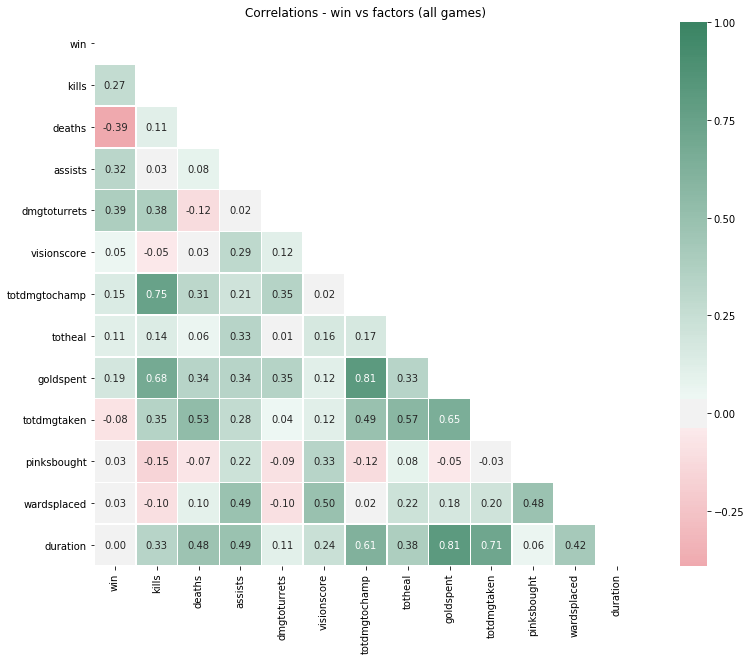

In [10]:
df_corr = df1._get_numeric_data()
df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (15,10))
ax = sns.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0,yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlations - win vs factors (all games)')
plt.savefig("grid.png")

Text(0.5, 1, 'Correlations - win vs factors (for games last less than 25 mins)')

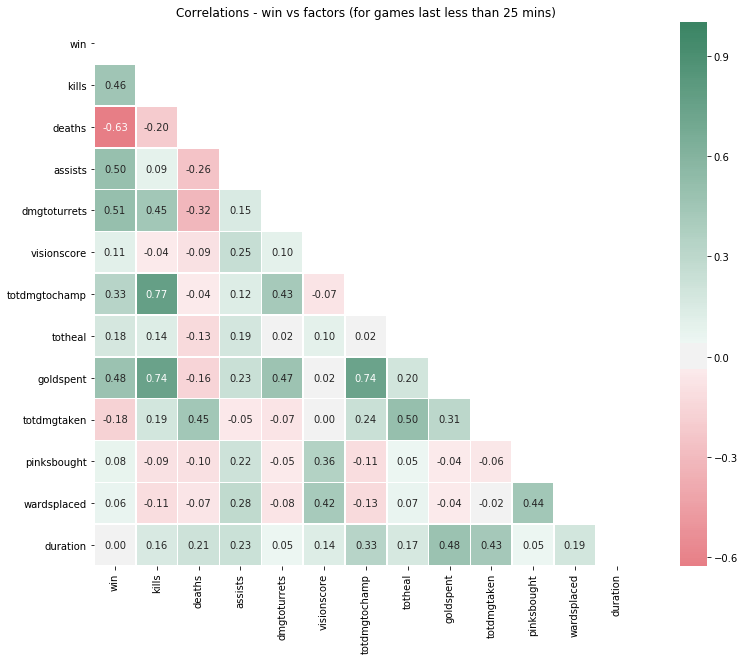

In [11]:
df_corr_2 = df1._get_numeric_data()
# for games less than 25mins
df_corr_2 = df_corr_2[df_corr_2['duration'] <= 1500]
df_corr_2 = df_corr_2.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

mask = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (15,10))
ax = sns.heatmap(df_corr_2.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlations - win vs factors (for games last less than 25 mins)')

Text(0.5, 1, 'Correlations - win vs factors (for games last more than 40 mins)')

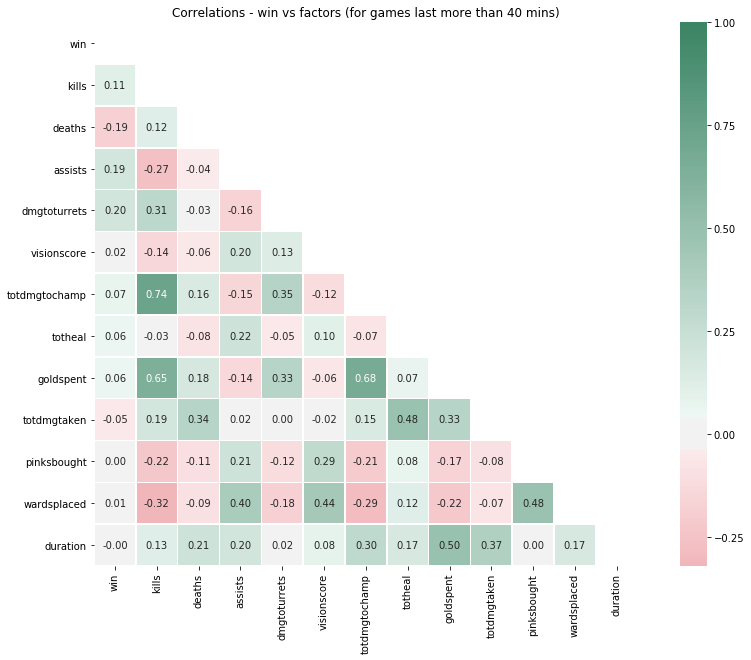

In [12]:
df_corr_3 = df1._get_numeric_data()
# for games more than 40mins
df_corr_3 = df_corr_3[df_corr_3['duration'] > 2400]
df_corr_3 = df_corr_3.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

mask = np.zeros_like(df_corr_3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (15,10))
ax = sns.heatmap(df_corr_3.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = mask, square=True, linewidths=.5, center = 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlations - win vs factors (for games last more than 40 mins)')

# Restraint relationship of heroes in the same position

In [13]:
features = pd.read_csv("feature_hero_dcdd_riva_teama.csv")

In [14]:
features.head()

,Unnamed: 0,matchid,1 - DUO_CARRY,1 - DUO_SUPPORT,1 - JUNGLE,1 - MID,1 - TOP,2 - DUO_CARRY,2 - DUO_SUPPORT,2 - JUNGLE,...,top_vs,carry_vs_score,support_vs_score,jungle_vs_score,mid_vs_score,top_vs_score,teammates_jungle_mid,teammates_carry_sup,teammates_carry_sup_score,teammates_jungle_mid_score
0,0,10,Draven,Nami,Warwick,Viktor,Fiora,Jinx,VelKoz,Skarner,...,Fiora vs Galio,-0.223015,-3.987730,NaN,-5.040000,1.256281,Warwick & Viktor,Draven & Nami,1.720183,-3.488372
1,1,11,Cassiopeia,Ziggs,Evelynn,Yasuo,Twisted Fate,Caitlyn,Karma,Warwick,...,Twisted Fate vs Wukong,NaN,NaN,-4.255319,4.633205,NaN,Evelynn & Yasuo,Cassiopeia & Ziggs,NaN,-1.592357
2,2,12,Draven,Janna,Amumu,Lux,Vayne,Twitch,Nami,Vi,...,Vayne vs Caitlyn,2.918288,2.587992,0.352941,-1.333010,NaN,Amumu & Lux,Draven & Janna,4.726688,5.032468
3,3,14,Caitlyn,Zac,Wukong,Orianna,Urgot,Lucian,Karma,Warwick,...,Urgot vs Darius,0.246978,NaN,NaN,1.054852,NaN,Wukong & Orianna,Caitlyn & Zac,NaN,-2.941176
4,4,15,Miss Fortune,Thresh,Warwick,Ahri,Garen,Ziggs,Nami,Lee Sin,...,Garen vs Tryndamere,NaN,1.661356,4.265949,1.525719,-0.588235,Warwick & Ahri,Miss Fortune & Thresh,2.794562,2.766532


In [15]:
df_5 = df1.sort_values(['matchid','adjposition'], ascending = [1,1])

df_5['shift 1'] = df_5['name'].shift()
df_5['shift -1'] = df_5['name'].shift(-1)

def get_rival(x):
    if x['player'] <= 5:
        name_return = x['name'] + ' vs ' + x['shift -1']
    else:
        name_return = x['name'] + ' vs ' + x['shift 1']
    return name_return

df_5['match up'] = df_5.apply(get_rival, axis = 1)

In [16]:
df_5.head()

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,totdmgtaken,pinksbought,wardsplaced,duration,platformid,seasonid,version,shift 1,shift -1,match up
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,25627.0,1.0,13.0,1909,EUW1,8,7.10.187.9675,NaN,Jinx,Draven vs Jinx
8,17,10,9,Jinx,DUO_CARRY,2 - DUO_CARRY,1.0,15.0,3.0,9.0,...,17655.0,1.0,6.0,1909,EUW1,8,7.10.187.9675,Draven,Nami,Jinx vs Draven
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,17769.0,1.0,17.0,1909,EUW1,8,7.10.187.9675,Jinx,VelKoz,Nami vs VelKoz
9,18,10,10,VelKoz,DUO_SUPPORT,2 - DUO_SUPPORT,1.0,4.0,5.0,19.0,...,13443.0,5.0,25.0,1909,EUW1,8,7.10.187.9675,Nami,Warwick,VelKoz vs Nami
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,41446.0,0.0,10.0,1909,EUW1,8,7.10.187.9675,VelKoz,Skarner,Warwick vs Skarner


In [17]:
df_rival = df_5.groupby(['adjposition', 'match up']).agg({'win': 'sum', 'match up': 'count'})
df_rival.columns = ['win matches', 'total matches']
df_rival['total matches'] = df_rival['total matches']
df_rival['win rate'] = df_rival['win matches'] /  df_rival['total matches']  * 100
df_rival['dominant score'] = df_rival['win rate'] - 50
df_rival['dominant score (ND)'] = abs(df_rival['dominant score'])
df_rival = df_rival[df_rival['total matches'] > df_rival['total matches'].sum()*0.0001]               
df_rival = df_rival.reset_index()

In [18]:
df_rival.head()

,adjposition,match up,win matches,total matches,win rate,dominant score,dominant score (ND)
0,DUO_CARRY,Ashe vs Caitlyn,1836.0,3625,50.648276,0.648276,0.648276
1,DUO_CARRY,Ashe vs Draven,491.0,1029,47.716229,-2.283771,2.283771
2,DUO_CARRY,Ashe vs Ezreal,757.0,1425,53.122807,3.122807,3.122807
3,DUO_CARRY,Ashe vs Jhin,332.0,635,52.283465,2.283465,2.283465
4,DUO_CARRY,Ashe vs Jinx,669.0,1368,48.903509,-1.096491,1.096491


In [19]:
df_rival1 = df_rival['match up'].str.split('vs', expand=True)
df_rival1[0].str.strip()
df_rival1[1].str.strip()
df_rival1.columns=['hero1','hero2']

In [20]:
df_rival = pd.concat([df_rival,df_rival1],axis = 1)

In [21]:
df_rival.head()

,adjposition,match up,win matches,total matches,win rate,dominant score,dominant score (ND),hero1,hero2
0,DUO_CARRY,Ashe vs Caitlyn,1836.0,3625,50.648276,0.648276,0.648276,Ashe,Caitlyn
1,DUO_CARRY,Ashe vs Draven,491.0,1029,47.716229,-2.283771,2.283771,Ashe,Draven
2,DUO_CARRY,Ashe vs Ezreal,757.0,1425,53.122807,3.122807,3.122807,Ashe,Ezreal
3,DUO_CARRY,Ashe vs Jhin,332.0,635,52.283465,2.283465,2.283465,Ashe,Jhin
4,DUO_CARRY,Ashe vs Jinx,669.0,1368,48.903509,-1.096491,1.096491,Ashe,Jinx


In [22]:
df_1 = df_rival[df_rival['adjposition'] == "DUO_CARRY"]

In [23]:
df_1

,adjposition,match up,win matches,total matches,win rate,dominant score,dominant score (ND),hero1,hero2
0,DUO_CARRY,Ashe vs Caitlyn,1836.0,3625,50.648276,0.648276,0.648276,Ashe,Caitlyn
1,DUO_CARRY,Ashe vs Draven,491.0,1029,47.716229,-2.283771,2.283771,Ashe,Draven
2,DUO_CARRY,Ashe vs Ezreal,757.0,1425,53.122807,3.122807,3.122807,Ashe,Ezreal
3,DUO_CARRY,Ashe vs Jhin,332.0,635,52.283465,2.283465,2.283465,Ashe,Jhin
4,DUO_CARRY,Ashe vs Jinx,669.0,1368,48.903509,-1.096491,1.096491,Ashe,Jinx
...,...,...,...,...,...,...,...,...,...
235,DUO_CARRY,Xayah vs Sivir,187.0,377,49.602122,-0.397878,0.397878,Xayah,Sivir
236,DUO_CARRY,Xayah vs Tristana,358.0,702,50.997151,0.997151,0.997151,Xayah,Tristana
237,DUO_CARRY,Xayah vs Twitch,540.0,1122,48.128342,-1.871658,1.871658,Xayah,Twitch
238,DUO_CARRY,Xayah vs Varus,265.0,540,49.074074,-0.925926,0.925926,Xayah,Varus


In [24]:
pic1 = df_1.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)
pic1

,win rate,hero1,hero2
0,50.648276,Ashe,Caitlyn
1,47.716229,Ashe,Draven
2,53.122807,Ashe,Ezreal
3,52.283465,Ashe,Jhin
4,48.903509,Ashe,Jinx
...,...,...,...
235,49.602122,Xayah,Sivir
236,50.997151,Xayah,Tristana
237,48.128342,Xayah,Twitch
238,49.074074,Xayah,Varus


In [26]:
pic2 = df_rival[df_rival['adjposition'] == "DUO_SUPPORT"]
pic2 = pic2.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)

In [28]:
pic1.to_csv("DUO_CARRY.csv")

In [29]:
pic2.to_csv("DUO_SUPPORT.csv")

In [30]:
pic2

,win rate,hero1,hero2
240,42.358079,Alistar,Bard
241,48.434622,Alistar,Blitzcrank
242,51.898734,Alistar,Brand
243,50.000000,Alistar,Braum
244,42.857143,Alistar,Janna
...,...,...,...
643,49.486653,Zyra,Nami
644,52.667814,Zyra,Rakan
645,44.021739,Zyra,Sona
646,46.000000,Zyra,Soraka


In [31]:
pic3 = df_rival[df_rival['adjposition'] == "MID"]
pic3 = pic3.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)


In [32]:
pic3['hero1'].value_counts().tail(20)

Xerath           9
Viktor           9
Diana            8
Taliyah          7
Ryze             6
Morgana          4
Gangplank        3
Lissandra        3
Azir             3
Karma            2
Karthus          2
Malzahar         2
Zilean           1
Aurelion Sol     1
Ezreal           1
Galio            1
Jayce            1
Swain            1
Lucian           1
Kayle            1
Name: hero1, dtype: int64

In [33]:
pic3['hero1'] = pic3['hero1'].str.strip()

In [34]:
pic3=pic3[~pic3['hero1'].isin(['Gangplank','Azir','Lissandra','Karthus','Karma','Malzahar','Galio','Kayle','Aurelion Sol','Zilean','Lucian','Swain','Ezreal','Jayce'])]

In [35]:
pic3

,win rate,hero1,hero2
1098,53.668763,Ahri,Akali
1099,47.770701,Ahri,Anivia
1100,47.229791,Ahri,Annie
1101,56.571429,Ahri,Aurelion Sol
1102,57.835821,Ahri,Azir
...,...,...,...
1584,51.384083,Ziggs,Orianna
1585,45.392491,Ziggs,Syndra
1586,55.263158,Ziggs,Veigar
1587,56.353591,Ziggs,Yasuo


In [174]:
pic3['hero1'].value_counts().tail(20)

Ekko            24
Katarina        22
Annie           17
LeBlanc         16
Veigar          15
Twisted Fate    14
Anivia          13
VelKoz          13
Ziggs           12
Akali           11
Brand           11
Talon           10
Vladimir        10
Xerath           9
Cassiopeia       9
Viktor           9
Diana            8
Taliyah          7
Ryze             6
Morgana          4
Name: hero1, dtype: int64

In [36]:
pic3['hero2'] = pic3['hero2'].str.strip()
pic3=pic3[~pic3['hero2'].isin(['Gangplank','Azir','Lissandra','Karthus','Karma','Malzahar','Galio','Kayle','Aurelion Sol','Zilean','Lucian','Swain','Ezreal','Jayce'])]

In [37]:
pic3['hero2'].value_counts().tail(20)

Kassadin        24
Katarina        22
Annie           17
LeBlanc         16
Veigar          15
Twisted Fate    14
Anivia          13
VelKoz          13
Ziggs           12
Akali           11
Brand           11
Vladimir        10
Talon           10
Viktor           9
Xerath           9
Cassiopeia       9
Diana            8
Taliyah          7
Ryze             6
Morgana          4
Name: hero2, dtype: int64

In [38]:
pic3=pic3[~pic3['hero2'].isin(['Morgana','Ryze'])]

In [39]:
pic3.to_csv("mid.csv")

In [40]:
pic4 = df_rival[df_rival['adjposition'] == "JUNGLE"]
pic4 = pic4.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)
pic4.to_csv("jungle.csv")

In [41]:
pic5 = df_rival[df_rival['adjposition'] == "TOP"]
pic5 = pic5.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)
pic5.to_csv("top.csv")

# Cooperation between heros in the same team

In [42]:
df_8 = df1.sort_values(['matchid','team_role'], ascending = [1,1])
df_8['shift -1'] = df_8['name'].shift(-1)
df_8['match up'] = df_8['name'] + ' & ' + df_8['shift -1']

In [43]:
df_teammates = (df_8[df_8['adjposition']=='DUO_CARRY']).append(df_8[df_8['adjposition']=='JUNGLE'])
df_teammates = df_teammates.groupby(['adjposition', 'match up']).agg({'win': 'sum', 'match up': 'count'})
df_teammates.columns = ['win matches', 'total matches']
df_teammates['total matches'] = df_teammates['total matches']
df_teammates['win rate'] = df_teammates['win matches'] /  df_teammates['total matches']  * 100
df_teammates['dominant score'] = df_teammates['win rate'] - 50
df_teammates['dominant score (ND)'] = abs(df_teammates['dominant score'])
df_teammates = df_teammates[df_teammates['total matches'] > df_teammates['total matches'].sum()*0.0001]                
df_teammates = df_teammates.reset_index()

In [44]:
df_teammates

,adjposition,match up,win matches,total matches,win rate,dominant score,dominant score (ND)
0,DUO_CARRY,Ashe & Alistar,201.0,393,51.145038,1.145038,1.145038
1,DUO_CARRY,Ashe & Annie,65.0,151,43.046358,-6.953642,6.953642
2,DUO_CARRY,Ashe & Bard,314.0,630,49.841270,-0.158730,0.158730
3,DUO_CARRY,Ashe & Blitzcrank,537.0,1063,50.517404,0.517404,0.517404
4,DUO_CARRY,Ashe & Brand,308.0,572,53.846154,3.846154,3.846154
...,...,...,...,...,...,...,...
1427,JUNGLE,Zac & Vladimir,83.0,166,50.000000,0.000000,0.000000
1428,JUNGLE,Zac & Xerath,66.0,134,49.253731,-0.746269,0.746269
1429,JUNGLE,Zac & Yasuo,210.0,429,48.951049,-1.048951,1.048951
1430,JUNGLE,Zac & Zed,258.0,578,44.636678,-5.363322,5.363322


In [45]:
df_teammates1 = df_teammates['match up'].str.split('&', expand=True)
df_teammates1[0].str.strip()
df_teammates1[1].str.strip()
df_teammates1.columns=['hero1','hero2']
df_teammates = pd.concat([df_teammates,df_teammates1],axis = 1)

In [46]:
df_teammates

,adjposition,match up,win matches,total matches,win rate,dominant score,dominant score (ND),hero1,hero2
0,DUO_CARRY,Ashe & Alistar,201.0,393,51.145038,1.145038,1.145038,Ashe,Alistar
1,DUO_CARRY,Ashe & Annie,65.0,151,43.046358,-6.953642,6.953642,Ashe,Annie
2,DUO_CARRY,Ashe & Bard,314.0,630,49.841270,-0.158730,0.158730,Ashe,Bard
3,DUO_CARRY,Ashe & Blitzcrank,537.0,1063,50.517404,0.517404,0.517404,Ashe,Blitzcrank
4,DUO_CARRY,Ashe & Brand,308.0,572,53.846154,3.846154,3.846154,Ashe,Brand
...,...,...,...,...,...,...,...,...,...
1427,JUNGLE,Zac & Vladimir,83.0,166,50.000000,0.000000,0.000000,Zac,Vladimir
1428,JUNGLE,Zac & Xerath,66.0,134,49.253731,-0.746269,0.746269,Zac,Xerath
1429,JUNGLE,Zac & Yasuo,210.0,429,48.951049,-1.048951,1.048951,Zac,Yasuo
1430,JUNGLE,Zac & Zed,258.0,578,44.636678,-5.363322,5.363322,Zac,Zed


In [47]:
df_teammates['hero1'].value_counts().tail(20)

Skarner        9
Pantheon       9
RekSai         9
Tryndamere     7
Corki          5
Galio          5
Diana          5
Ekko           5
Fizz           3
Trundle        3
Malphite       3
Riven          2
Rumble         2
ChoGath        2
Poppy          2
Nautilus       1
Quinn          1
Ziggs          1
Aatrox         1
Kennen         1
Name: hero1, dtype: int64

In [48]:
df_teammates['hero1'] = df_teammates['hero1'].str.strip()

In [49]:
df_teammates['hero2'] = df_teammates['hero2'].str.strip()

In [50]:
df_teammates=df_teammates[~df_teammates['hero1'].isin(['Quinn','Ziggs','Aatrox','Nautilus','Kennen','Poppy','ChoGath','Rumble','Riven','Trundle','Malphite','Fizz'])]

In [51]:
df_teammates=df_teammates[~df_teammates['hero2'].isin(['Quinn','Ziggs','Aatrox','Nautilus','Kennen','Poppy','ChoGath','Rumble','Riven','Trundle','Malphite','Fizz'])]

In [52]:
df_teammates['hero2'].value_counts().tail(20)

Lissandra       15
Taric           14
Azir            12
Swain           11
Jayce            9
Karthus          9
Fiddlesticks     9
Teemo            7
Ezreal           7
Aurelion Sol     6
Gragas           6
Shen             6
Heimerdinger     6
Kayle            5
Miss Fortune     4
Lucian           4
Sion             2
Pantheon         1
Nunu             1
Corki            1
Name: hero2, dtype: int64

In [53]:
df_teammates=df_teammates[~df_teammates['hero2'].isin(['ChoGath','Sion','Kennen','Nunu','Pantheon','Corki','Riven'])]

In [54]:
df_teammates=df_teammates[~df_teammates['hero1'].isin(['ChoGath','Sion','Kennen','Nunu','Pantheon','Corki','Riven'])]

In [55]:
junglemid = df_teammates[df_teammates['adjposition'] == "JUNGLE"]
junglemid = junglemid.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)
junglemid.columns = ["win rate",'jungle','mid']

In [56]:
junglemid['mid'].value_counts().tail(20)

Ryze            17
Lissandra       15
Malzahar        14
Azir            12
Karma           12
Swain           11
Karthus          9
Jayce            9
Ezreal           7
Aurelion Sol     6
Heimerdinger     6
Zilean           6
Kayle            5
Galio            5
Lucian           4
Gragas           1
Lulu             1
Fiddlesticks     1
Zyra             1
Teemo            1
Name: mid, dtype: int64

In [57]:
junglemid['mid'] = junglemid['mid'].str.strip()
junglemid=junglemid[~junglemid['mid'].isin(['Fiddlesticks','Zyra','Lulu','Gragas','Teemo','Lucian','Kayle','Galio','Aurelion Sol','Zilean','Heimerdinger'])]

In [58]:
junglemid['jungle'].value_counts().tail(20)

Ivern           26
Nocturne        24
Jarvan IV       22
Shyvana         20
Twitch          20
Nidalee         18
Rammus          18
Udyr            17
Volibear        16
Fiddlesticks    14
Kindred         13
Wukong          13
Olaf            13
Maokai          11
Skarner          8
RekSai           8
Tryndamere       6
Diana            5
Ekko             5
Galio            5
Name: jungle, dtype: int64

In [59]:
junglemid['jungle'] = junglemid['jungle'].str.strip()
junglemid=junglemid[~junglemid['jungle'].isin(['Ekko','Diana','Galio','Tryndamere'])]

In [60]:
junglemid.to_csv("junglemid.csv")

In [61]:
bot = df_teammates[df_teammates['adjposition'] == "DUO_CARRY"]
bot = bot.drop(['adjposition','match up','win matches','total matches','dominant score','dominant score (ND)'],axis = 1)
bot.columns = ["win rate",'ADC','SUPPORT']

In [62]:
bot['ADC'].value_counts().tail(20)

Caitlyn         33
Lucian          31
Ezreal          31
Vayne           30
Xayah           30
Jinx            29
Ashe            28
Draven          26
Miss Fortune    26
Jhin            25
Twitch          25
Tristana        23
Varus           22
Sivir           21
Kalista         19
KogMaw          19
Graves           5
Name: ADC, dtype: int64

In [63]:
bot['ADC']=bot['ADC'].str.strip()
bot=bot[~bot['ADC'].isin(['Graves'])]

In [64]:
bot['SUPPORT'].value_counts().tail(20)

Bard            16
Alistar         16
Morgana         16
Soraka          16
Maokai          16
Lux             15
Taric           14
Zilean          14
VelKoz          14
Annie           12
Malzahar        11
Galio           11
Veigar           8
Fiddlesticks     8
Teemo            6
Shen             6
Gragas           5
Miss Fortune     4
Taliyah          1
Xerath           1
Name: SUPPORT, dtype: int64

In [65]:
bot['SUPPORT']=bot['SUPPORT'].str.strip()
bot=bot[~bot['SUPPORT'].isin(['Teemo','Shen','Gragas','Miss Fortune','Taliyah','Xerath'])]

In [66]:
bot.to_csv("bot.csv")